# 📊 Análisis Descriptivo de Contratos Públicos


Este notebook presenta un análisis descriptivo de los datos relacionados con contratos públicos. 
Se incluyen visualizaciones y conclusiones clave sobre la distribución de montos, estados de procesos y entidades con mayor participación.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "/Users/melisaguerrero/Desktop/kapak/cleaned_dataset-fe.csv"
df = pd.read_csv(file_path)


df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 73 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   sl_contract_id                                                                                            2106 non-null   int64  
 1   sie_ic_ruc                                                                                                1512 non-null   float64
 2   sie_ic_proveedor                                                                                          1512 non-null   object 
 3   sie_ic_monto_presupuestado                                                                                2106 non-null   float64
 4   sie_ic_monto_contrato                                                         

,sl_contract_id,sie_ic_ruc,sie_ic_proveedor,sie_ic_monto_presupuestado,sie_ic_monto_contrato,sie_ic_monto_adjudicacion,sie_ic_indicador_01,sie_ic_indicador_04,sie_ic_indicador_05,sie_ic_indicador_06,...,sd_saldo_pago_a_45_dias,sd_saldo_pago_contra_entrega_de_bienes_obras_o_servicio,sd_saldo_pagos_por_planilla,sd_estado_adjudicado,sd_estado_cancelado,sd_estado_desierta,sd_estado_ejecucion,sd_estado_finalizada,sd_estado_otro,sd_estado_recepcion
0,1755652,NaN,NaN,0.0,0.0,0.0,NaN,1.0,1,1.0,...,False,False,False,False,False,True,False,False,False,False
1,1747349,NaN,NaN,0.0,0.0,0.0,NaN,1.0,1,1.0,...,False,True,False,False,False,True,False,False,False,False
2,1746667,NaN,NaN,0.0,0.0,0.0,NaN,1.0,1,1.0,...,False,False,False,False,False,True,False,False,False,False
3,1746522,NaN,NaN,0.0,0.0,0.0,NaN,1.0,1,0.0,...,False,True,False,False,False,True,False,False,False,False
4,1746358,9.914452e+11,DIEMPEC CIA. LTDA. DISTRIBUIDORA FARMACEUTICA,25800.0,24252.0,24252.0,1.0,1.0,1,0.0,...,False,True,False,False,False,False,False,False,False,True


## ▶︎ Distribución de Montos


Analizamos la distribución de los montos presupuestado, contrato y adjudicación 
para entender su variabilidad y detectar posibles valores extremos.


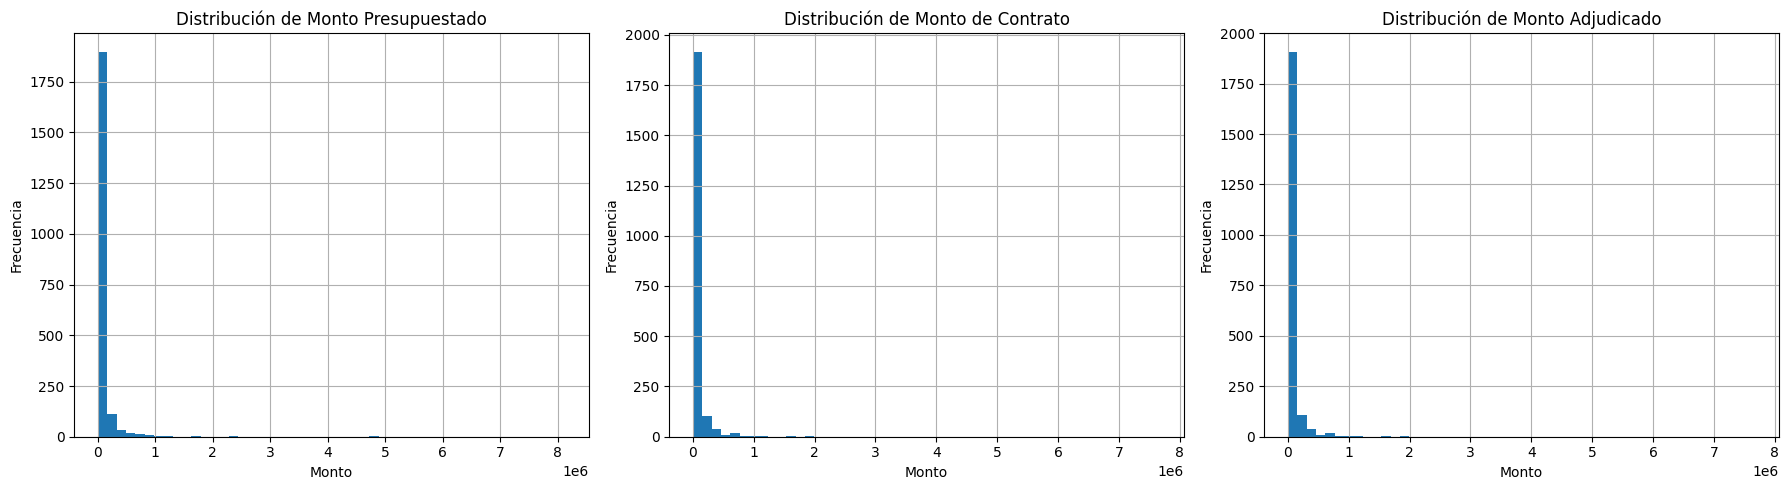

In [3]:

# Histogramas de montos presupuestado, contrato y adjudicado
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
df["sie_ic_monto_presupuestado"].hist(bins=50, ax=axes[0])
axes[0].set_title("Distribución de Monto Presupuestado")
axes[0].set_xlabel("Monto")
axes[0].set_ylabel("Frecuencia")

df["sie_ic_monto_contrato"].hist(bins=50, ax=axes[1])
axes[1].set_title("Distribución de Monto de Contrato")
axes[1].set_xlabel("Monto")
axes[1].set_ylabel("Frecuencia")

df["sie_ic_monto_adjudicacion"].hist(bins=50, ax=axes[2])
axes[2].set_title("Distribución de Monto Adjudicado")
axes[2].set_xlabel("Monto")
axes[2].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


## ▶︎ Comparación de Montos


Comparamos los montos presupuestado, de contrato y adjudicación usando un boxplot para ver su distribución y detectar outliers.


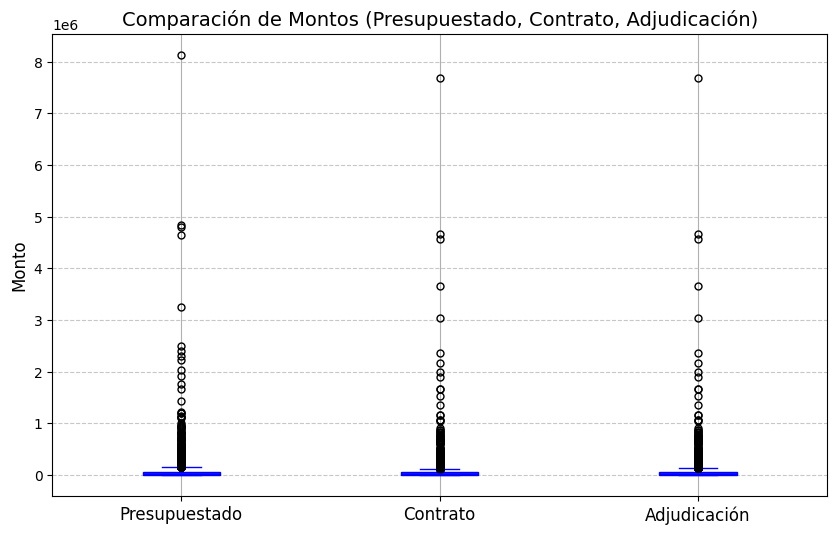

In [4]:

# Mejorar la visualización del boxplot

fig, ax = plt.subplots(figsize=(10, 6))

# Usar colores personalizados y mejorar la estética
df[["sie_ic_monto_presupuestado", "sie_ic_monto_contrato", "sie_ic_monto_adjudicacion"]].boxplot(
    patch_artist=True,  # Rellenar las cajas
    boxprops=dict(facecolor="lightblue", color="blue"), 
    medianprops=dict(color="blue", linewidth=2),  
    whiskerprops=dict(color="blue"),  
    capprops=dict(color="blue"),  
    flierprops=dict(marker="o", color="green", markersize=5)  
)

ax.set_title("Comparación de Montos (Presupuestado, Contrato, Adjudicación)", fontsize=14)
ax.set_ylabel("Monto", fontsize=12)
ax.set_xticklabels(["Presupuestado", "Contrato", "Adjudicación"], fontsize=12) 

plt.grid(axis="y", linestyle="--", alpha=0.7) 
plt.show()


## ▶︎ Evolución de Contratos por Mes


Aquí vemos cómo varía la cantidad de contratos a lo largo del tiempo, agrupados por mes.


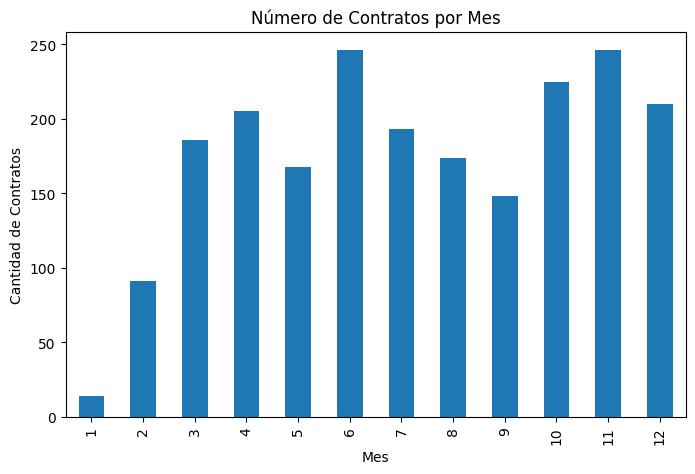

In [5]:

contracts_per_month = df["sie_ic_month"].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8, 5))
contracts_per_month.plot(kind="bar", ax=ax)
ax.set_title("Número de Contratos por Mes")
ax.set_xlabel("Mes")
ax.set_ylabel("Cantidad de Contratos")
plt.show()


## ▶︎ Estado de los Procesos


Se analiza cuántos procesos están finalizados, cancelados, en ejecución, entre otros.


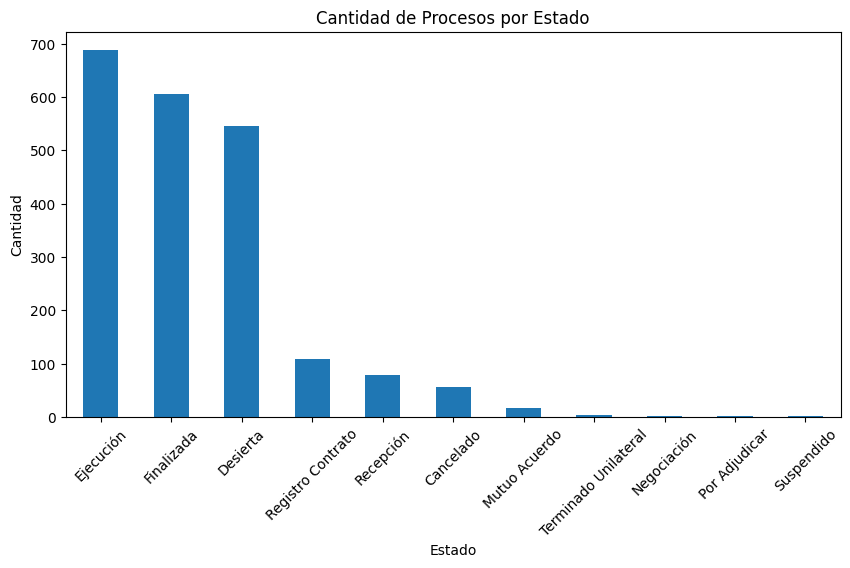

In [6]:
# Diccionario para etiquetas más cortas
status_labels = {
    "sie_ic_estado_proc_adjudicado_-_registro_de_contratos":'Registro Contrato',
    "sie_ic_estado_proc_cancelado": "Cancelado",
    "sie_ic_estado_proc_desierta": "Desierta",
    "sie_ic_estado_proc_ejecucion_de_contrato": "Ejecución",
    "sie_ic_estado_proc_en_recepcion": "Recepción",
    "sie_ic_estado_proc_finalizada": "Finalizada",
    "sie_ic_estado_proc_finalizado_por_mutuo_acuerdo": "Mutuo Acuerdo",
    "sie_ic_estado_proc_negociacion": "Negociación",
    "sie_ic_estado_proc_por_adjudicar": "Por Adjudicar",
    "sie_ic_estado_proc_suspendido": "Suspendido",
    "sie_ic_estado_proc_terminado_unilateralmente": "Terminado Unilateral"
}

# Contar los estados
status_counts = df[status_labels.keys()].sum().sort_values(ascending=False)
status_counts.index = [status_labels[col] for col in status_counts.index]  # Reemplazar etiquetas

# Generar gráfico con etiquetas más cortas
fig, ax = plt.subplots(figsize=(10, 5))
status_counts.plot(kind="bar", ax=ax)
ax.set_title("Cantidad de Procesos por Estado")
ax.set_xlabel("Estado")
ax.set_ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()



### Conclusión:
La mayoría de los procesos están finalizados o en ejecución, pero también hay varios cancelados o desiertos.


## ▶︎ Entidades con más Contratos


Se identifican las entidades con más procesos de contratación.


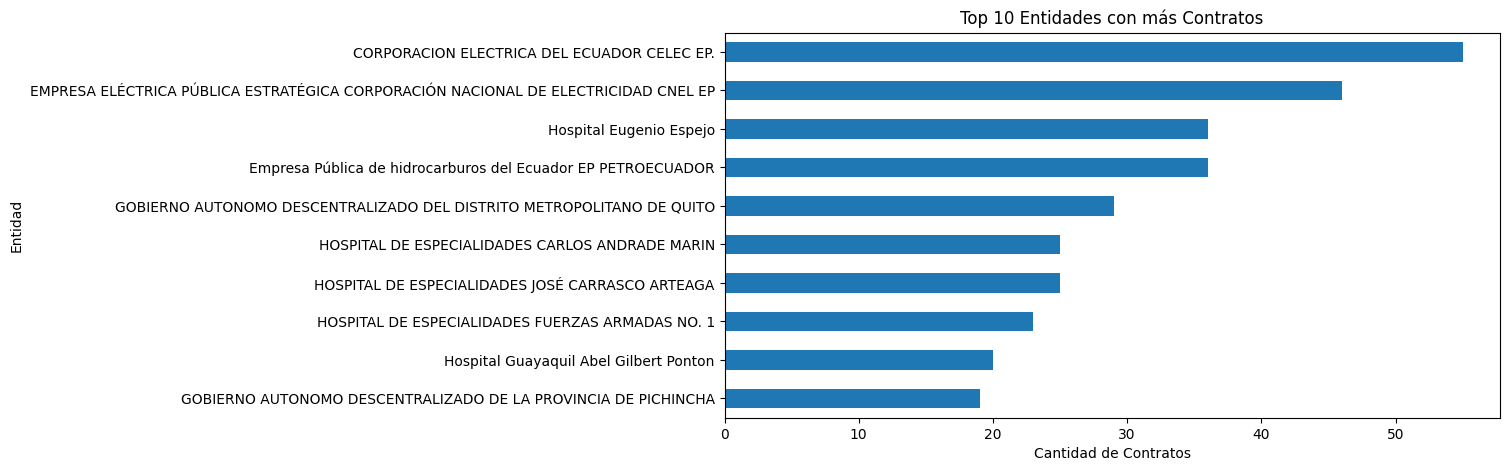

In [7]:

top_entities = df["sd_entidad"].value_counts().nlargest(10)

fig, ax = plt.subplots(figsize=(10, 5))
top_entities.plot(kind="barh", ax=ax)
ax.set_title("Top 10 Entidades con más Contratos")
ax.set_xlabel("Cantidad de Contratos")
ax.set_ylabel("Entidad")
plt.gca().invert_yaxis()
plt.show()


# Frecuencia de indicadores

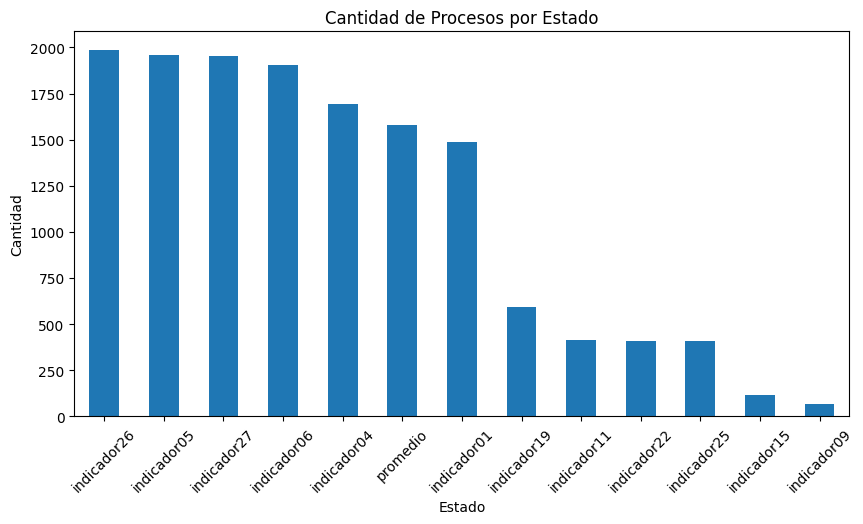

In [8]:
# Diccionario para etiquetas más cortas
indicators_labels = {
    "sie_ic_indicador_01":'indicador01',
    "sie_ic_indicador_04": "indicador04",
    "sie_ic_indicador_05": "indicador05",
    "sie_ic_indicador_06": "indicador06",
    "sie_ic_indicador_09": "indicador09",
    "sie_ic_indicador_11": "indicador11",
    "sie_ic_indicador_15": "indicador15",
    "sie_ic_indicador_19": "indicador19",
    "sie_ic_indicador_22": "indicador22",
    "sie_ic_indicador_25": "indicador25",
    "sie_ic_indicador_26": "indicador26",
    "sie_ic_indicador_27": "indicador27",
    "sie_ic_promedio": "promedio"
}

# Contar los estados
indicators_counts = df[indicators_labels.keys()].sum().sort_values(ascending=False)
indicators_counts.index = [indicators_labels[col] for col in indicators_counts.index]  # Reemplazar etiquetas

# Generar gráfico con etiquetas más cortas
fig, ax = plt.subplots(figsize=(10, 5))
indicators_counts.plot(kind="bar", ax=ax)
ax.set_title("Cantidad de Procesos por Estado")
ax.set_xlabel("Estado")
ax.set_ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


## Procesos con discrepancias en montos de contrato y adjudicación por entidad

In [9]:
# Seleccionar columnas de estado
columnas_estado = [col for col in df.columns if col.startswith("estado_")]

# Filtrar los procesos donde ambos montos son 0.0
df_montos_cero = df[(df["sie_ic_monto_adjudicacion"] > 0.0) & (df["sie_ic_monto_contrato"] ==0.0)]

# Contar cuántos cumplen con la condición
cantidad_montos_cero = len(df_montos_cero)

# Seleccionar las columnas necesarias
df_resultado = df_montos_cero[["sd_entidad", "sie_ic_monto_contrato", "sie_ic_monto_adjudicacion"] + columnas_estado]

# Mostrar la cantidad de filas que cumplen la condición
print(f"Cantidad de procesos con montos en 0.0: {cantidad_montos_cero}")

# Mostrar las primeras filas
df_resultado.head(10)


Cantidad de procesos con montos en 0.0: 96


,sd_entidad,sie_ic_monto_contrato,sie_ic_monto_adjudicacion
27,HOSPITAL DE ESPECIALIDADES PORTOVIEJO,0.0,261578.26
40,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,0.0,70149.88
103,EMPRESA PUBLICA MUNICIPAL MANCOMUNADA DE LOS C...,0.0,81500.00
121,COORDINACION ZONAL 7-SALUD,0.0,41900.00
124,HOSPITAL GENERAL-BABAHOYO,0.0,61619.72
135,DIRECCION DISTRITAL 24D02-LA LIBERTAD-SALINAS-...,0.0,22078.79
183,DIRECCION DISTRITAL 24D02-LA LIBERTAD-SALINAS-...,0.0,42900.00
226,Municipalidad de Santa Isabel,0.0,28877.00
244,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,0.0,26529.00
272,Universidad Estatal del Sur de Manabí,0.0,32674.30


In [10]:
columnas_estado = [col for col in df.columns if col.startswith("estado_")]

# Filtrar los procesos donde el monto del contrato no es igual al monto de adjudicación
df_diferentes = df[df["sie_ic_monto_contrato"] == df["sie_ic_monto_adjudicacion"]]

# Seleccionar las columnas necesarias incluyendo la entidad y los estados
df_resultado_con_entidad_igual = df_diferentes[["sd_entidad", "sie_ic_monto_contrato", "sie_ic_monto_adjudicacion"] + columnas_estado]

df_resultado_con_entidad_igual.head(10)

,sd_entidad,sie_ic_monto_contrato,sie_ic_monto_adjudicacion
0,SANTA BARBARA EP,0.00,0.00
1,UNIVERSIDAD DE GUAYAQUIL,0.00,0.00
2,HOSPITAL DE ESPECIALIDADES CARLOS ANDRADE MARIN,0.00,0.00
3,GOBIERNO AUTONOMO DESCENTRALIZADO DE LA PROVIN...,0.00,0.00
4,Hospital Guayaquil Abel Gilbert Ponton,24252.00,24252.00
5,Empresa Pública de hidrocarburos del Ecuador E...,274044.97,274044.97
6,HOSPITAL DE ESPECIALIDADES JOSÉ CARRASCO ARTEAGA,0.00,0.00
7,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,217187.00,217187.00
8,EMPRESA MUNICIPAL DE AGUA POTABLE Y ALCANTARIL...,0.00,0.00
9,HONORABLE GOBIERNO AUTONOMO DESCENTRALIZADO DE...,0.00,0.00


In [11]:
columnas_estado = [col for col in df.columns if col.startswith("estado_")]

# Filtrar los procesos donde el monto del contrato no es igual al monto de adjudicación
df_diferentes = df[df["sie_ic_monto_contrato"] != df["sie_ic_monto_adjudicacion"]]

# Seleccionar las columnas necesarias incluyendo la entidad y los estados
df_resultado_con_entidad = df_diferentes[["sd_entidad", "sie_ic_monto_contrato", "sie_ic_monto_adjudicacion"] + columnas_estado]



# Mostrar las primeras 12 filas
df_resultado_con_entidad.head(12)

,sd_entidad,sie_ic_monto_contrato,sie_ic_monto_adjudicacion
27,HOSPITAL DE ESPECIALIDADES PORTOVIEJO,0.0,261578.26
40,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,0.0,70149.88
103,EMPRESA PUBLICA MUNICIPAL MANCOMUNADA DE LOS C...,0.0,81500.00
121,COORDINACION ZONAL 7-SALUD,0.0,41900.00
124,HOSPITAL GENERAL-BABAHOYO,0.0,61619.72
135,DIRECCION DISTRITAL 24D02-LA LIBERTAD-SALINAS-...,0.0,22078.79
183,DIRECCION DISTRITAL 24D02-LA LIBERTAD-SALINAS-...,0.0,42900.00
226,Municipalidad de Santa Isabel,0.0,28877.00
244,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,0.0,26529.00
272,Universidad Estatal del Sur de Manabí,0.0,32674.30


In [12]:
df_diferentes["diferencia_presupuesto_adjudicacion"] = (
    df_diferentes["sie_ic_monto_adjudicacion"] - df_diferentes["sie_ic_monto_presupuestado"] 
)

# Seleccionar solo las columnas necesarias
columnas_seleccionadas = [
    "sd_entidad",
    "sie_ic_monto_presupuestado",
    "sie_ic_monto_contrato",
    "sie_ic_monto_adjudicacion",
    "diferencia_presupuesto_adjudicacion",
    "sie_ic_estado_proc_desierta",  # Estado relevante
]

df_resultado_montos = df_diferentes[columnas_seleccionadas]


# Mostrar las primeras filas
df_resultado_montos.head(30)

/var/folders/d4/rl4m87ys2k923bg0z6md8_mc0000gn/T/ipykernel_31896/687419565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diferentes["diferencia_presupuesto_adjudicacion"] = (


,sd_entidad,sie_ic_monto_presupuestado,sie_ic_monto_contrato,sie_ic_monto_adjudicacion,diferencia_presupuesto_adjudicacion,sie_ic_estado_proc_desierta
27,HOSPITAL DE ESPECIALIDADES PORTOVIEJO,284324.20,0.0,261578.26,-22745.94,False
40,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,71906.00,0.0,70149.88,-1756.12,False
103,EMPRESA PUBLICA MUNICIPAL MANCOMUNADA DE LOS C...,82600.00,0.0,81500.00,-1100.00,False
121,COORDINACION ZONAL 7-SALUD,43000.00,0.0,41900.00,-1100.00,False
124,HOSPITAL GENERAL-BABAHOYO,65206.05,0.0,61619.72,-3586.33,False
135,DIRECCION DISTRITAL 24D02-LA LIBERTAD-SALINAS-...,23333.49,0.0,22078.79,-1254.70,False
183,DIRECCION DISTRITAL 24D02-LA LIBERTAD-SALINAS-...,68165.40,0.0,42900.00,-25265.40,False
226,Municipalidad de Santa Isabel,30636.16,0.0,28877.00,-1759.16,False
244,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,26800.00,0.0,26529.00,-271.00,False
272,Universidad Estatal del Sur de Manabí,34394.30,0.0,32674.30,-1720.00,False


In [13]:
top_10_entidades_desiertas = df[df["sie_ic_estado_proc_desierta"] == True].groupby("sd_entidad").agg(
    cantidad_contratos=("sl_contract_id", "count"),
    monto_total_adjudicacion=("sie_ic_monto_adjudicacion", "sum")
).sort_values(by="cantidad_contratos", ascending=False).head(10)

top_10_entidades_desiertas

,cantidad_contratos,monto_total_adjudicacion
sd_entidad,,
CORPORACION ELECTRICA DEL ECUADOR CELEC EP.,31,0.0
Empresa Pública de hidrocarburos del Ecuador EP PETROECUADOR,17,0.0
HOSPITAL DE ESPECIALIDADES CARLOS ANDRADE MARIN,15,0.0
Hospital Eugenio Espejo,13,30240.0
EMPRESA ELÉCTRICA PÚBLICA ESTRATÉGICA CORPORACIÓN NACIONAL DE ELECTRICIDAD CNEL EP,11,94655.0
GOBIERNO AUTONOMO DESCENTRALIZADO DE LA PROVINCIA DE PICHINCHA,9,0.0
HOSPITAL DE ESPECIALIDADES JOSÉ CARRASCO ARTEAGA,7,0.0
GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE SANTO DOMINGO,7,29523.0
Municipalidad de Guayaquil,7,0.0


In [14]:
top_entidades_desiertas_con_monto = df[df["sie_ic_estado_proc_desierta"] == True].groupby("sd_entidad").agg(
    cantidad_contratos_desiertos=("sl_contract_id", "count"),
    sie_ic_monto_adjudicacion=("sie_ic_monto_adjudicacion", "sum")
).query("sie_ic_monto_adjudicacion > 0.0").sort_values(by="cantidad_contratos_desiertos", ascending=False).head(20)

# Mostrar el resultado
top_entidades_desiertas_con_monto

,cantidad_contratos_desiertos,sie_ic_monto_adjudicacion
sd_entidad,,
Hospital Eugenio Espejo,13,30240.00
EMPRESA ELÉCTRICA PÚBLICA ESTRATÉGICA CORPORACIÓN NACIONAL DE ELECTRICIDAD CNEL EP,11,94655.00
GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE SANTO DOMINGO,7,29523.00
HOSPITAL DE ESPECIALIDADES FUERZAS ARMADAS NO. 1,6,82048.31
CENTRO CLÍNICO QUIRÚRGICO AMBULATORIO (HOSPITAL DEL DÍA) EFREN JURADO LOPEZ,4,39149.00
DIRECCION GENERAL DE AVIACION CIVIL,3,10499.00
UNIVERSIDAD ESTATAL DE BOLIVAR,2,25173.20
DIRECCION DISTRITAL DE SALUD N 13D02 JARAMIJO-MANTA-MONTECRISTI,1,28000.00
GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DEL CANTON LAS NAVES,1,189810.00


# Conteo de procesos por estado

In [15]:
columnas_estado = [col for col in df.columns if col.startswith("sie_ic_estado_")]
conteo_estados = df[columnas_estado].sum()
df_conteo_estados = pd.DataFrame({'Estado': conteo_estados.index, 'Cantidad': conteo_estados.values})
df_conteo_estados

,Estado,Cantidad
0,sie_ic_estado_proc_adjudicado_-_registro_de_co...,108
1,sie_ic_estado_proc_cancelado,57
2,sie_ic_estado_proc_desierta,546
3,sie_ic_estado_proc_ejecucion_de_contrato,688
4,sie_ic_estado_proc_en_recepcion,78
5,sie_ic_estado_proc_finalizada,606
6,sie_ic_estado_proc_finalizado_por_mutuo_acuerdo,16
7,sie_ic_estado_proc_negociacion,1
8,sie_ic_estado_proc_por_adjudicar,1
9,sie_ic_estado_proc_suspendido,1


### Conclusión:
- **Ejecución** es el estado más común, con **688 procesos activos**.
- **Desierta** presenta un número elevado (**546 procesos**), lo que puede indicar una alta tasa de procesos sin adjudicación.
- **Finalizada** con **606 procesos**, lo que sugiere un alto porcentaje de contratos cumplidos.
- Los estados **Cancelado, Otro y Recepción** tienen menor frecuencia.